In [1]:
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## Create Graph Instance

In [2]:
G = nx.Graph()

## Add Nodes to Graph

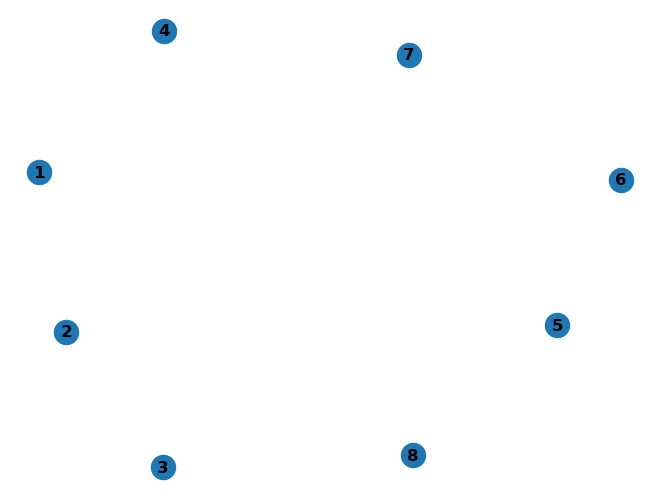

In [3]:
# Add individual nodes
G.add_node(1)
G.add_node(2)
G.add_node(3)

# Add nodes from list
G.add_nodes_from([4,5,6])

# Nodes with properties
G.add_nodes_from([
    (7, {"color": "red"}),
    (8, {"color": "green"})
])

nx.draw(G, with_labels=True, font_weight='bold')

## Add Edges to Graph

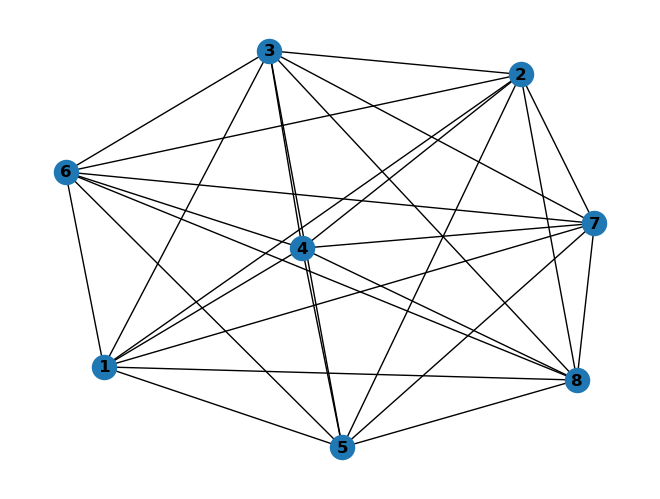

In [4]:
# Add edges from a list of tuples
for i in range(1, 9):
    for j in range(1, 9):
        if (i != j):
            G.add_edge(i,j)

nx.draw(G, with_labels=True, font_weight='bold')

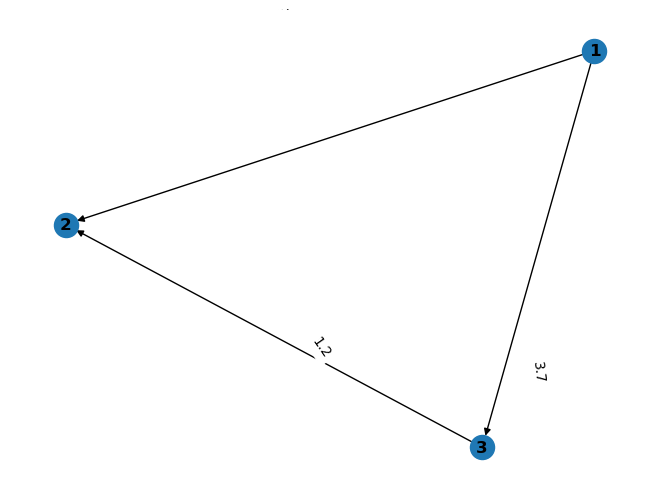

In [5]:
DG = nx.DiGraph()

DG.add_node(1, time='5pm')
DG.add_node(2, time='6pm')
DG.add_node(3, time='7pm')

DG.add_edge(1,2, weight=1.2)
DG.add_edge(1,3, weight=3.7)
DG.add_edge(3,2, weight=8.7)

pos=nx.spring_layout(DG)
labels = nx.get_edge_attributes(DG,'weight')

nx.draw(DG, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(DG,pos, edge_labels=labels);

## Delete Nodes

In [6]:
G.remove_node(2)
G.remove_edge(6,8)

## Add Attributes

### Add Attributes to Nodes

In [7]:
G.add_node(1, time='5pm')
G.nodes[1]["time"]="6pm"
print(G[1])
print(G.nodes[1])

{3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}}
{'time': '6pm'}


### Add Attributes to Edges

In [8]:
G.add_edge(1, 2, weight=4.7)
G.edges[5,6]['weight'] = 4.2
print(G.edges(data=True))

[(1, 3, {}), (1, 4, {}), (1, 5, {}), (1, 6, {}), (1, 7, {}), (1, 8, {}), (1, 2, {'weight': 4.7}), (3, 4, {}), (3, 5, {}), (3, 6, {}), (3, 7, {}), (3, 8, {}), (4, 5, {}), (4, 6, {}), (4, 7, {}), (4, 8, {}), (5, 6, {'weight': 4.2}), (5, 7, {}), (5, 8, {}), (6, 7, {}), (7, 8, {})]


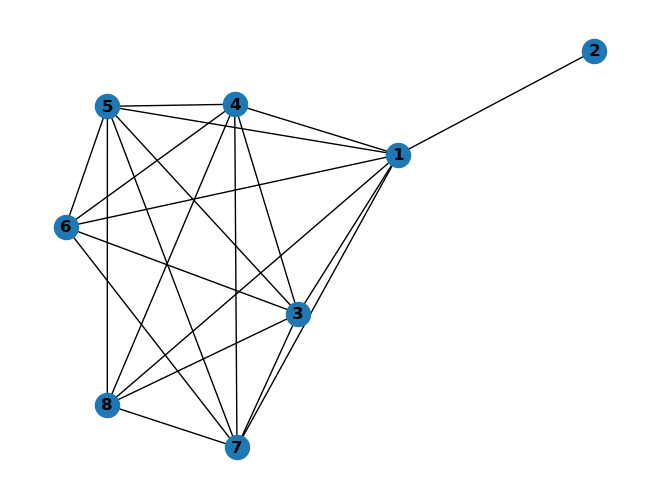

In [9]:
nx.draw(G, with_labels=True, font_weight='bold')

# Graph Theory

## Definitions

Two edges are adjacent if they share a vertex.

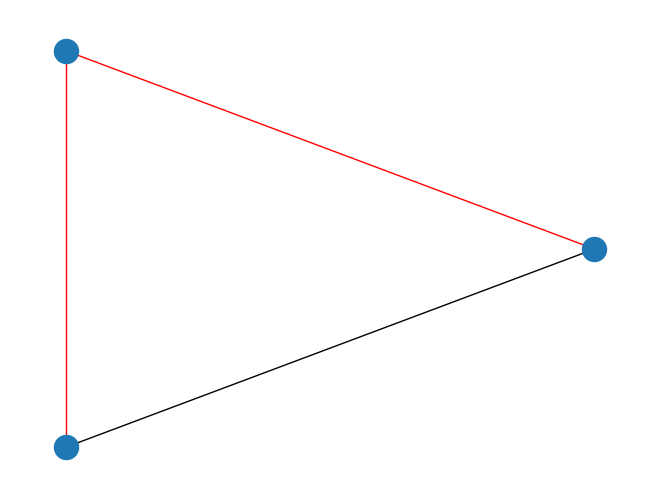

In [10]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3])
G.add_edge(1,2,color='r')
G.add_edge(2,3,color='r')
G.add_edge(3,1,color='black')

pos = nx.circular_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]

nx.draw(G, pos, edge_color=colors)

Two edges asociated to the same pair of vertices are parallel edges.

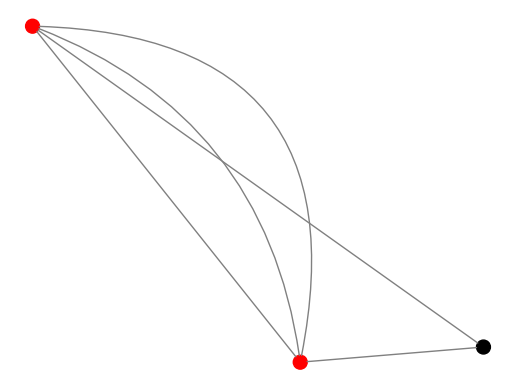

In [11]:
G = nx.MultiGraph()

G.add_nodes_from([1, 2, 3])

G.add_edges_from([
    (1, 2), 
    (2, 1), 
    (1, 2),
    (2, 3),
    (3, 1)
])

pos = nx.random_layout(G)


nx.draw_networkx_nodes(G, pos, node_color = ['r', 'r', 'black'], node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]], xycoords='data',
                xytext=pos[e[1]], textcoords='data',
                arrowprops=dict(arrowstyle="-", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle="arc3,rad=rrr".replace('rrr',str(0.3*e[2])
                                ),
                                ),
                )
plt.axis('off');

An incident edge in  a single vertex is a cycle/loop.

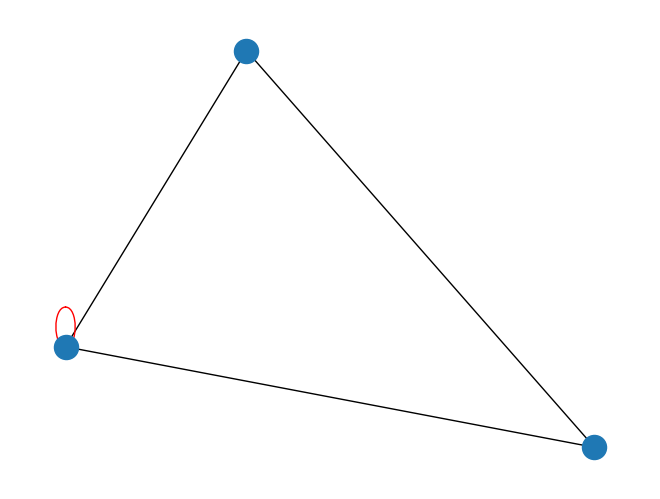

In [12]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3])
G.add_edge(1,1,color='r')
G.add_edge(1,2,color='black')
G.add_edge(2,3,color='black')
G.add_edge(3,1,color='black')

pos = nx.random_layout(G)

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]

nx.draw(G, pos, edge_color=colors)

A vertex that does not incide in any edge is an isolated vertex.

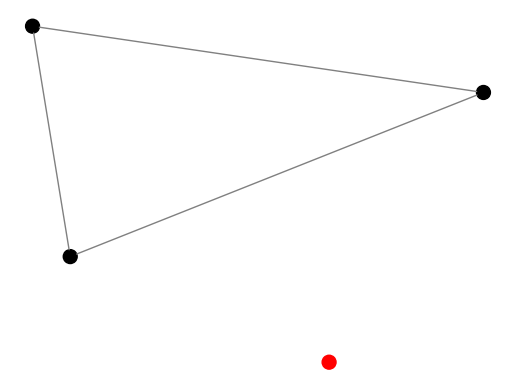

In [13]:
G = nx.Graph()

G.add_nodes_from([1, 2, 3, 4])

G.add_edges_from([
    (1, 2), 
    (2, 3),
    (3, 1)
])

pos = nx.random_layout(G)


nx.draw_networkx_nodes(G, pos, node_color = ['black', 'black', 'black', 'r'], node_size = 100, alpha = 1)
ax = plt.gca()
for e in G.edges:
    ax.annotate("",
                xy=pos[e[0]],
                xycoords='data',
                xytext=pos[e[1]], 
                textcoords='data',
                arrowprops=dict(
                    arrowstyle="-", 
                    color="0.5",
                    shrinkA=5,
                    shrinkB=5,
                    patchA=None, 
                    patchB=None))
plt.axis('off');

* An undirected graph without loops is called a **simple graph**
* A graph with parallel edges is called a **multigraph**
* A **complete graph** is a graph that has an edge for each pair of vertices
* A **weighted graph** is one that has weights associated to vertices and/or nodes

## Information from a Graph

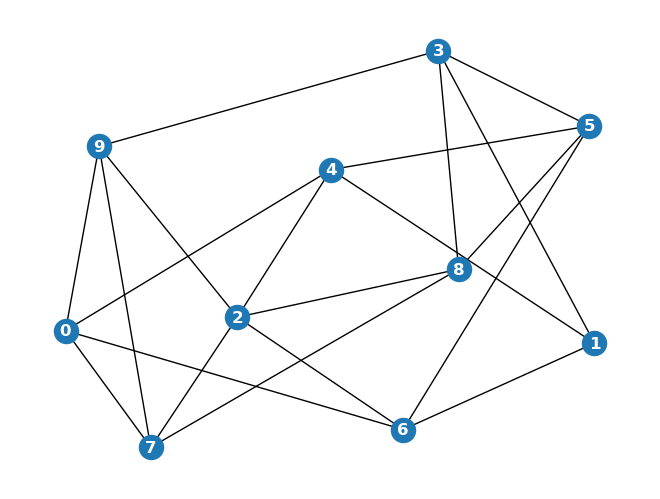

In [14]:
G = nx.Graph()
G.add_nodes_from(range(10))
G.add_edges_from([(0, 4), (0, 6), (0, 7), (0, 9)])
G.add_edges_from([(1, 3), (1, 4), (1, 6)])
G.add_edges_from([(2, 4), (2, 6), (2, 7), (2, 8), (2, 9)])
G.add_edges_from([(3, 5), (3, 8), (3, 9)])
G.add_edges_from([(4, 5)])
G.add_edges_from([(5, 6), (5, 8)])
G.add_edges_from([(7, 8), (7, 9)])

nx.draw(G, with_labels=True, font_weight="bold", font_color='w')

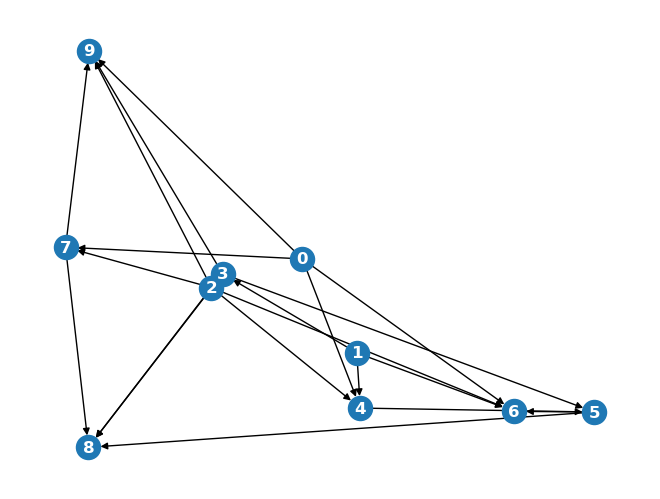

In [15]:
DG = nx.DiGraph()
DG.add_nodes_from(range(10))
DG.add_edges_from([(0, 4), (0, 6), (0, 7), (0, 9)])
DG.add_edges_from([(1, 3), (1, 4), (1, 6)])
DG.add_edges_from([(2, 4), (2, 6), (2, 7), (2, 8), (2, 9)])
DG.add_edges_from([(3, 5), (3, 8), (3, 9)])
DG.add_edges_from([(4, 5)])
DG.add_edges_from([(5, 6), (5, 8)])
DG.add_edges_from([(7, 8), (7, 9)])

nx.draw(DG, with_labels=True, font_weight="bold", font_color='w')

## Degree

In [16]:
for node in G.nodes:
    print(f"Node {node} has degree {G.degree(node)}")

Node 0 has degree 4
Node 1 has degree 3
Node 2 has degree 5
Node 3 has degree 4
Node 4 has degree 4
Node 5 has degree 4
Node 6 has degree 4
Node 7 has degree 4
Node 8 has degree 4
Node 9 has degree 4


In [17]:
for node in DG.nodes:
    print(f"Node {node} degree")
    print(f"In: {DG.in_degree(node)}")
    print(f"Out: {DG.out_degree(node)}\n")

Node 0 degree
In: 0
Out: 4

Node 1 degree
In: 0
Out: 3

Node 2 degree
In: 0
Out: 5

Node 3 degree
In: 1
Out: 3

Node 4 degree
In: 3
Out: 1

Node 5 degree
In: 2
Out: 2

Node 6 degree
In: 4
Out: 0

Node 7 degree
In: 2
Out: 2

Node 8 degree
In: 4
Out: 0

Node 9 degree
In: 4
Out: 0



## Diameter

In [18]:
print(f"The diameter of the first graph is {nx.diameter(G)}")

The diameter of the first graph is 3


In [19]:
if (nx.is_strongly_connected(DG)):
    print(f"The diameter of the second graph is {nx.diameter(DG)}")
else:
    print(f"Second graph is not strongly connected")
    

Second graph is not strongly connected


## Eulerian Graphs

### Eulerian Circuits
An Eulerian Circuit is a path that visits every edge once and finishes on the starting position.

In [20]:
if nx.is_eulerian(G):
    path = list(nx.eulerian_circuit(G))
    for node in path:
        print(f"{node}", end="\t")
else:
    print(f"Graph is not eulerian")
    

Graph is not eulerian


(0, 2)	(2, 1)	(1, 0)	

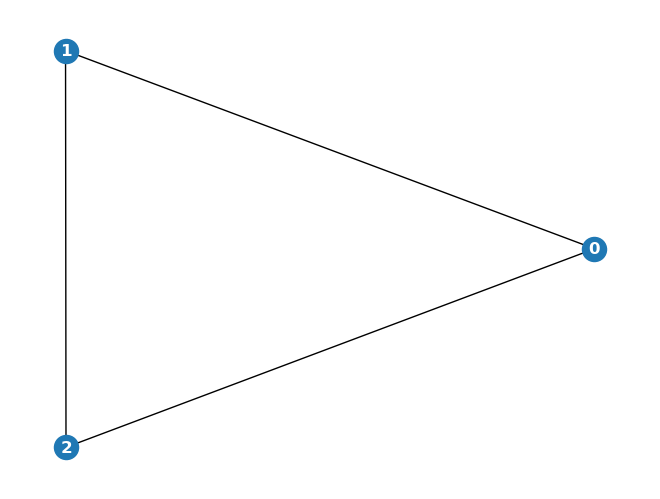

In [21]:
G = nx.complete_graph(3)
nx.draw(G, with_labels=True, font_weight="bold", font_color='w')

if nx.is_eulerian(G):
    path = list(nx.eulerian_circuit(G))
    for node in path:
        print(f"{node}", end="\t")
else:
    print(f"Graph is not eulerian")

If a given undirected graph $G=(V, E)$ is complete (also called a *clique*), then there exists a path $p=\left(v_{1}, v_{2}, \dots, v_{k}, v_{1}\right) \subseteq V^{n}$ that traverses every edge $e\in E$. That is, $G$ is Eulerian.

### Eulerian Paths

An Eulerian Path is a path that visits visists every edge once, without necessarily returning to the starting vertex. Note however than an Eulerian Path is a more general, less restricitve, kind of path; this allos an Eulerian Circuit to be a valid Eulerian Path, but the converse is not generally true.

In [24]:
if nx.is_eulerian(G):
    path = list(nx.eulerian_circuit(G))
    for node in path:
        print(f"{node}", end="\t")
else:
    print(f"Graph is not eulerian")

(0, 2)	(2, 1)	(1, 0)	

## Dijkstra's Algorithm

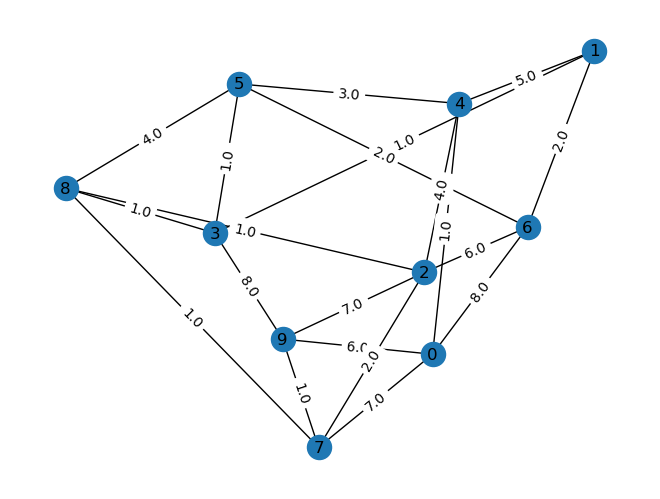

In [46]:
G = nx.Graph()

G.add_nodes_from(range(10))
G.add_weighted_edges_from([
    (0, 4, 1.0),
    (0, 9, 6.0),
    (0, 7, 7.0),
    (0, 6, 8.0),
    (1, 4, 5.0),
    (2, 9, 7.0),
    (2, 4, 4.0),
    (2, 7, 2.0),
    (2, 8, 1.0),
    (2, 6, 6.0),
    (3, 8, 1.0),
    (4, 5, 3.0),
    (5, 8, 4.0),
    (5, 6, 2.0),
    (7, 9, 1.0),
    (3, 5, 1.0),
    (3, 9, 8.0),
    (1, 6, 2.0),
    (1, 3, 1.0),
    (7, 8, 1.0)
])


pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels);

In [44]:
nx.shortest_path(G, source=1, target=9)

[1, 3, 9]

## Centrality

Centrality is one of the most imporant concepts for Social Network Analysisis. This is a technic that determines the importance/relevance of a vertex or edge according to the topology and structure of a graph.

Thanks to centrality searching algorithms work like they do, such as *Google's* `Page Rank`.

Centrality can be understood as a measurement or value that a vertex holds. It may be evalauted to a certain scale to determiine the relevance of the vertex inside the graph and allows us to compare or contrast it with other vertices.